In [1]:
import rebound
import numpy as np

In [2]:

sa = rebound.SimulationArchive("TOI.bin")

In [3]:
len(sa)

5092

In [4]:
Noutputs = len(sa)
x = np.zeros((5,Noutputs))
y = np.zeros((5,Noutputs))
z = np.zeros((5,Noutputs))
time = []

for i,sims in enumerate(sa): 
    #sims.move_to_com()
    com = sims.calculate_com()
    time.append(sims.t/(2*np.pi))
    x[0][i] = sims.particles[0].x   # This stores the data which allows us to plot it later
    y[0][i] = sims.particles[0].y
    z[0][i] = sims.particles[0].z
    x[1][i] = sims.particles[1].x
    y[1][i] = sims.particles[1].y
    z[1][i] = sims.particles[1].z
    x[2][i] = sims.particles[2].x
    y[2][i] = sims.particles[2].y
    z[2][i] = sims.particles[2].z
    x[3][i] = sims.particles[3].x
    y[3][i] = sims.particles[3].y
    z[3][i] = sims.particles[3].z
    x[4][i] = com.x
    y[4][i] = com.y
    z[4][i] = com.z


/rds/general/user/wc421/home/anaconda3/envs/test1/lib/python3.9/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


Text(0.5, 1.0, 'TOI Star System Track')

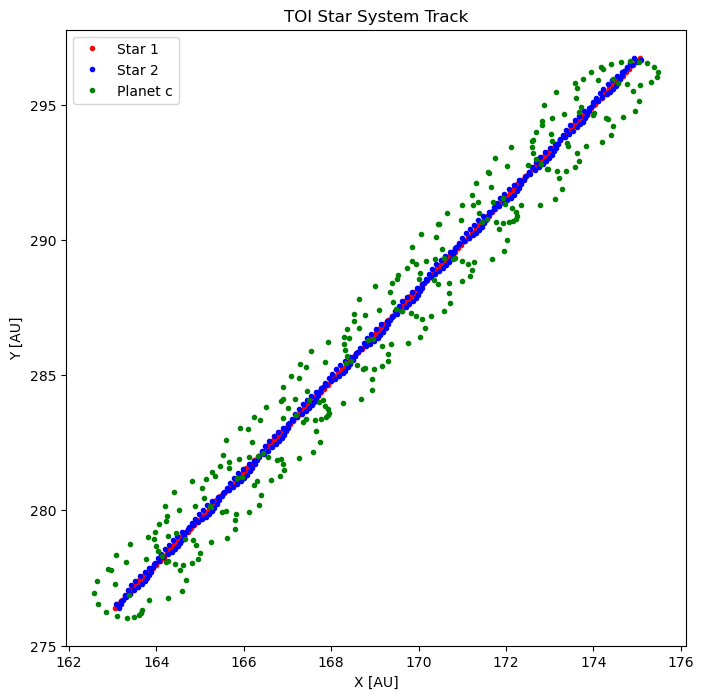

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
#ax.set_xlim([-6,6])
#ax.set_ylim([-6,6])

#first = 851 # Death moment for b
end = len(sa)-1
start = 4800

m=3

plt.plot(x[0][start:end], y[0][start:end],"o",ms = m,label = "Star 1",color="red");
plt.plot(x[1][start:end], y[1][start:end],"o",ms = m,label = "Star 2",color="blue");
#plt.plot(x[2][start:end], y[2][start:end],"o",ms = m,label = "Planet b",color="orange");
plt.plot(x[3][start:end], y[3][start:end],"o",ms = m,label = "Planet c",color="green");
#plt.plot(x[4][start:end], y[4][start:end],"x",ms = m,label = "COM");
#plt.xlim(2400,2425)
#plt.ylim(-1470,-1460)
plt.xlabel("X [AU]")
plt.ylabel("Y [AU]")

#fit,cov = np.polyfit(x[2][3700:4459],y[2][3700:4459],1,cov=True)
#TFit = np.poly1d(fit)
#plt.plot(x[2],TFit(x[2]),color="red")
plt.legend()
plt.title("TOI Star System Track")
#plt.savefig("Paths_End.png",dpi=300)

In [20]:
sa[852].t/(2*np.pi)

7817000.000886124

Text(0.5, 0.92, 'TOI Star System Track')

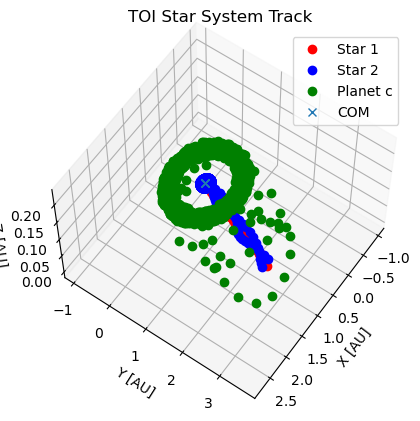

In [16]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

first = 900

ax.plot3D(x[0][:first], y[0][:first], z[0][:first], "o",label = "Star 1", color="red");
ax.plot3D(x[1][:first], y[1][:first], z[1][:first],"o",label = "Star 2",color="blue");
#ax.plot3D(x[2][:first], y[2][:first], z[2][:first],"o",label = "Planet b",color="orange");
ax.plot3D(x[3][:first], y[3][:first], z[3][:first],"o",label = "Planet c",color="green");
ax.plot3D(x[4][:first], y[4][:first], z[4][:first],"x",label = "COM");


plt.xlabel("X [AU]")
plt.ylabel("Y [AU]")
ax.set_zlabel("Z [AU]")

ax.view_init(60, 35)
plt.legend()
plt.title("TOI Star System Track")

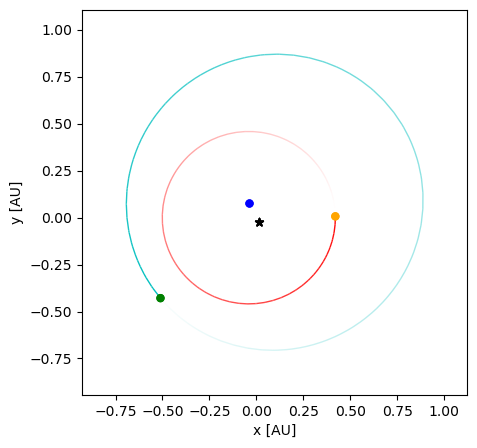

In [27]:
n = 0
fig1 = rebound.OrbitPlot(sa[n],particles=[2,3], unitlabel="[AU]",color=True)
fig1.particles.set_color(["orange","green"])
fig2 = rebound.OrbitPlot(sa[n], particles = [1], orbit_style=None,show_primary=True, fig=fig1.fig, ax = fig1.ax)
fig2.particles.set_color(["blue"])
#fig1.fig.savefig("TOI.png",dpi = 300)

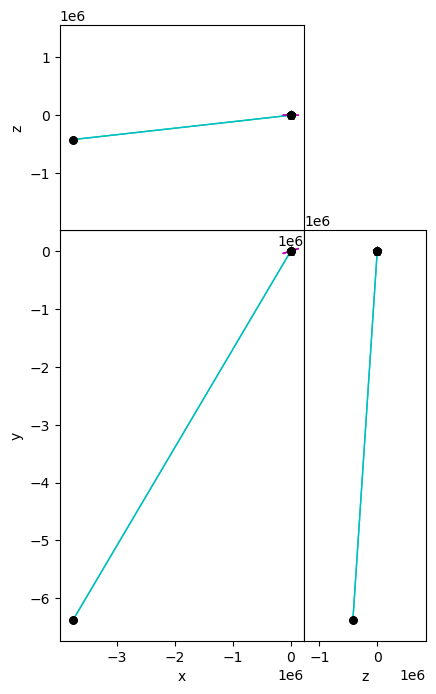

In [7]:
fig_tres = rebound.OrbitPlotSet(sa[len(sa)-1],color=True)

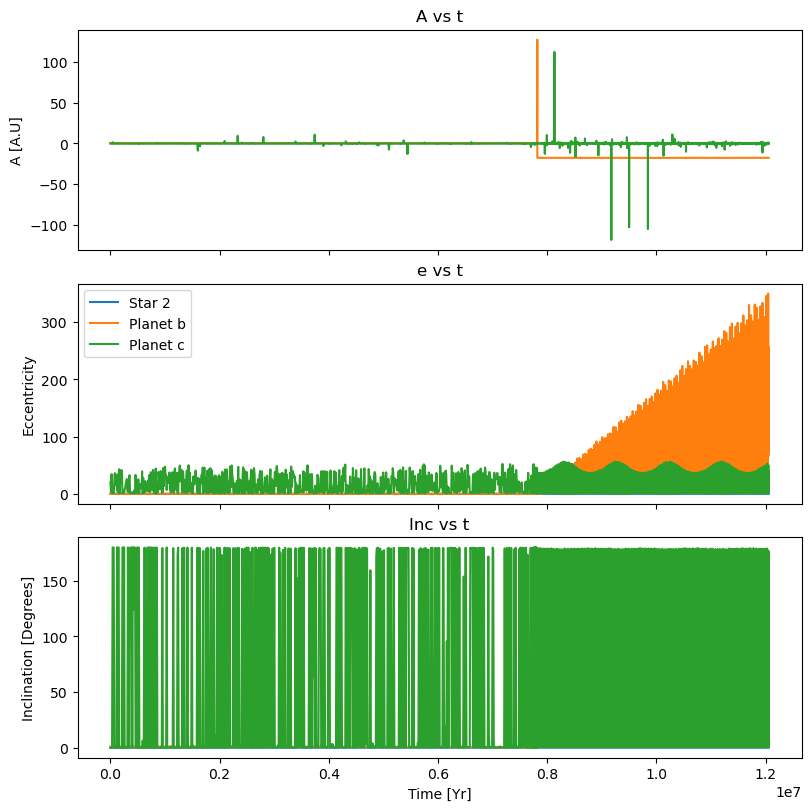

In [9]:
import matplotlib.pyplot as plt



time = []
e = []
a = []
inc = []

e2 = []
a2 = []
inc2 = []

e3 = []
a3 = []
inc3 = []

for i,sims in enumerate(sa): 
    time.append(sims.t/(2*np.pi))
    
    e.append(sims.particles[1].calculate_orbit().e)
    a.append(sims.particles[1].calculate_orbit().a)
    inc.append((sims.particles[1].calculate_orbit().inc)*180/np.pi)

    e2.append(sims.particles[2].calculate_orbit().e)
    a2.append(sims.particles[2].calculate_orbit().a)
    inc2.append((sims.particles[2].calculate_orbit().inc)*180/np.pi)
    
    e3.append(sims.particles[3].calculate_orbit(primary = sims.particles[1]).e)
    a3.append(sims.particles[3].calculate_orbit(primary = sims.particles[1]).a)
    inc3.append((sims.particles[3].calculate_orbit(primary = sims.particles[1]).inc)*180/np.pi)
    

f, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(8,8), sharex=True,layout='constrained')

ax1.plot(time, a)
ax1.plot(time, a2)
ax1.plot(time, a3)


#ax1.set_ylim(0,4)
ax1.set_ylabel("A [A.U]")
ax1.set_title('A vs t')
ax1.ticklabel_format(useOffset=False)

ax2.set_title('e vs t')

ax2.plot(time, e,label = "Star 2")
ax2.plot(time, e2,label = "Planet b")
ax2.plot(time, e3,label = "Planet c")
ax2.legend()

ax2.set_ylabel("Eccentricity")
#ax2.set_ylim(0,1)

ax3.plot(time, inc)
ax3.plot(time, inc2)
ax3.plot(time, inc3)

#ax3.set_ylim(0,1)
ax3.set_ylabel("Inclination [Degrees]")
ax3.set_title('Inc vs t')

plt.xlabel("Time [Yr]")

#plt.gca().invert_xaxis()

plt.ticklabel_format(useOffset=False)

#ax1.set_ylim(-100,100)
#ax2.set_ylim(0,10)

#plt.savefig("Plots_Update.png",dpi=300)

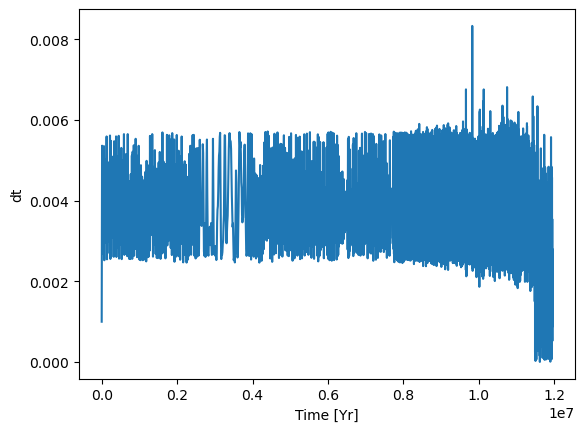

In [9]:
time = []
dt = []
energy = []
for i,sims in enumerate(sa): 
    time.append(sims.t/(2*np.pi))
    dt.append(sims.dt)
    energy.append(sims.energy())

plt.plot(time,dt)
plt.ylabel("dt")
plt.xlabel("Time [Yr]")
plt.ticklabel_format(useOffset=False)

#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
#plt.ylim(0,1)


(-2.0, 0.0)

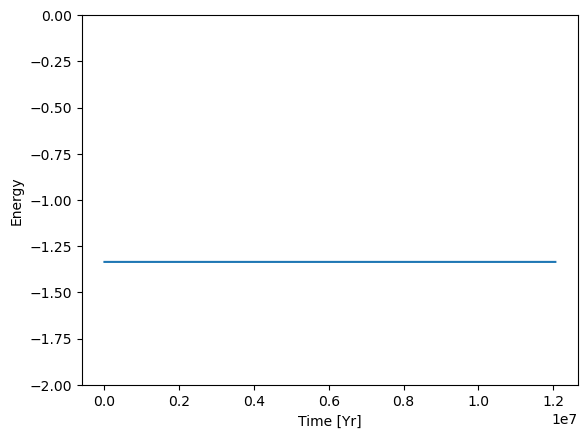

In [21]:
energy = []
for i,sims in enumerate(sa): 
    energy.append(sims.energy())

plt.plot(time,energy)
plt.ylabel("Energy")
plt.xlabel("Time [Yr]")
plt.ticklabel_format(useOffset=False)
plt.ylim(-2,0)



Text(0, 0.5, 'Time Between')

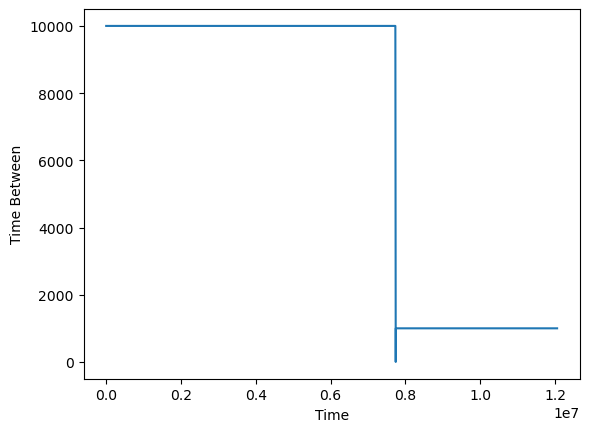

In [22]:
time_between = []
for i in range(len(sa)-2):
    time_between.append((sa[i+1].t-sa[i].t)/(2*np.pi))
plt.plot(time[:len(time_between)],time_between)
#plt.ylim(0,20000)
plt.ticklabel_format(useOffset=False)
plt.xlabel("Time")
plt.ylabel("Time Between")

In [39]:
time_between[first-100]

9999.999812644992

In [33]:
len(sa)

3747